This code block imports essential libraries for data analysis, visualization, and machine learning model evaluation, setting up the environment for data exploration, model building, and result analysis.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
import os

**Data Loading**

In [19]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
val= pd.read_csv('Dig-MNIST.csv')

In [20]:
test.head()

,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Renaming Column 'id' to 'label' in Test DataFrame**

In [21]:
test.rename(columns={'id':'label'}, inplace=True)
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Displaying Shapes of DataFrames**

In [23]:
print('Train Shape: ', train.shape)
print('Test Shape:',test.shape)
print('Submission Shape: ',submission.shape)
print('Validation Shape: ',val.shape)

Train Shape:  (60000, 785)
Test Shape: (5000, 785)
Submission Shape:  (5000, 2)
Validation Shape:  (10240, 785)


**Grouping and Counting Data by Label**

In [24]:
train.groupby(by='label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

**Splitting Data into Training and Testing Sets**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:], train.iloc[:, 0], test_size=0.2)

In [26]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52524,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Visualizing First 10 Images of Each Class in Training Set**

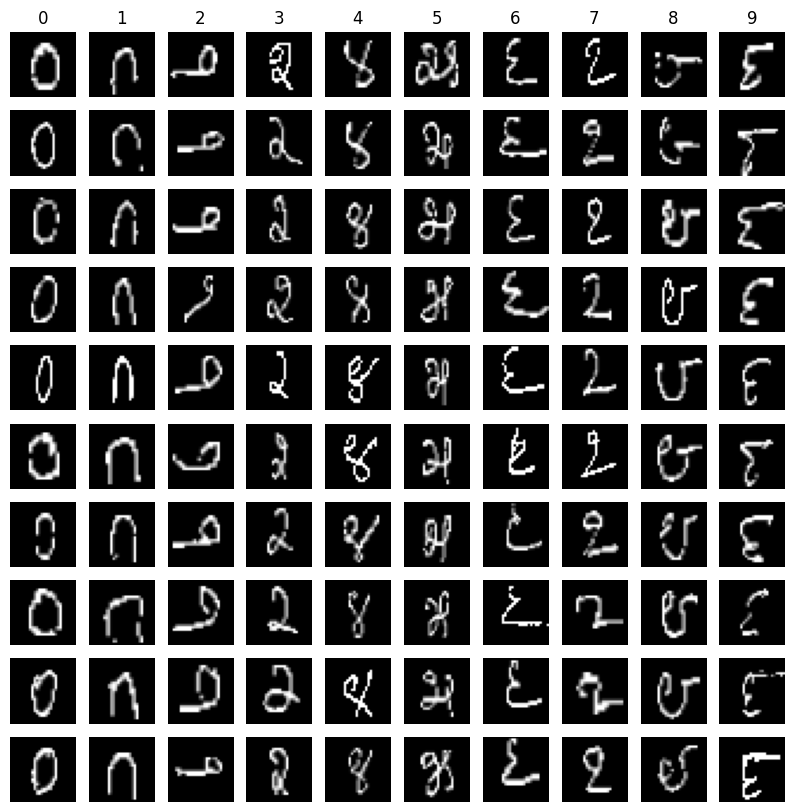

In [28]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

for i in range(10):
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10):
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

In [29]:
from sklearn import svm
from sklearn.decomposition import PCA


In [30]:
from sklearn.impute import SimpleImputer

# Impute NaN values with mean (you can use other strategies like median or most frequent)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Apply PCA to imputed data
pca = PCA(n_components=0.7, whiten=True)
X_train_PCA = pca.fit_transform(X_train_imputed)


In [31]:
X_test_PCA = pca.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [32]:
sv = svm.SVC(kernel='rbf',C=9)
sv.fit(X_train_PCA , y_train)


SVC(C=9)

In [33]:
y_predsv = sv.predict(X_test_PCA)

In [34]:
print('accuracy is',accuracy_score(y_predsv,y_test))

scoreclf= accuracy_score(y_predsv,y_test)

accuracy is 0.99


In [37]:
test_x = test.values[:,1:]
test_x = pca.transform(test_x)

In [38]:
preds = sv.predict(test_x)


**Creating Submission File with Predictions**

In [39]:
submission['label'] = preds
submission.to_csv('submission.csv', index=False)

**Displaying the First Few Rows of the Submission DataFrame**

In [40]:
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
